<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EC%A7%81%EA%B5%90%EB%B0%B0%EC%97%B4%EB%8B%A4%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#데이터 불러오기
import pandas as pd
crime=pd.read_csv('./범행동기데이터.csv')
crime

,생활비마련,유흥비마련,호기심,우발적,부주의,사행심,기타,미상
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
251,0,0,1,0,0,0,0,0
252,0,0,1,0,0,0,0,0
253,0,0,1,0,0,0,0,0
254,0,0,1,0,0,0,0,0


In [16]:
#데이터의 직교배열(직교성유지)을 위해 중복되는 행은 제거한다.
crime=crime.drop_duplicates()
crime

,생활비마련,유흥비마련,호기심,우발적,부주의,사행심,기타,미상
0,1,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1,1
8,1,0,1,1,1,0,1,1
32,1,0,1,0,1,0,1,1
39,0,0,1,0,1,0,1,1
57,0,0,1,0,0,0,1,1
120,0,0,1,0,0,0,0,0


In [36]:
import numpy as np
#잡음인자 고려한 데이터셋 재가공 7 * 2 = 14

#각 요인에 기타 잡음인자를 넣었을때

#생활비 비율 : 0.0007445447776865657
#유흥비 비율 : 0.0020330368487928843
#기타 비율 : 0.0007863205192211682
#사행심 비율 : 0.00023427433524657375
#호기심 비율 : 0.039711191335740074
#우발적 비율 : 0.00012201213258143357
#미상 비율 : 0.00017303907078018992
#부주의 비율 : 0.00028719995162948184

a=0.0007445447776865657+0.0020330368487928843+0.0007863205192211682+0.00023427433524657375+0.039711191335740074+0.00012201213258143357+0.00028719995162948184
b=0.00028719995162948184+0.00012201213258143357+0.039711191335740074+0.0007863205192211682+0.0020330368487928843+0.0007445447776865657
c=0.0007445447776865657+0.039711191335740074+0.00012201213258143357+0.0007863205192211682+0.00028719995162948184
d=0.0007445447776865657+0.039711191335740074+0.00028719995162948184+0.0007863205192211682
e=0.039711191335740074+0.00028719995162948184+0.0007863205192211682
f=0.039711191335740074+0.0007863205192211682
g=0.039711191335740074
h=0.0007445447776865657+0.0020330368487928843+0.0007863205192211682+0.00023427433524657375+0.039711191335740074+0.00012201213258143357+0.00028719995162948184
i=0.00028719995162948184+0.00012201213258143357+0.039711191335740074+0.0007863205192211682+0.0020330368487928843+0.0007445447776865657
j=0.0007445447776865657+0.039711191335740074+0.00012201213258143357+0.0007863205192211682+0.00028719995162948184
k=0.0007445447776865657+0.039711191335740074+0.00028719995162948184+0.0007863205192211682
l=0.039711191335740074+0.00028719995162948184+0.0007863205192211682
m=0.039711191335740074+0.0007863205192211682
n=0.039711191335740074

mean_group=[a,b,c,d,e,f,g,h,i,j,k,m,n]
for x in mean_group:
  x=np.mean(x)
  print(x)

#기타랑 미상의 인자수준 데이터셋이 똑같으니 잡음을 두개에서 하나로 합친다 결국
#두개의 잡음을 하나로 보고 7 * 1의 데이터셋 생성

0.04391857990089818
0.04368430556565161
0.04165126871685872
0.04152925658427729
0.04078471180659072
0.04049751185496124
0.039711191335740074
0.04391857990089818
0.04368430556565161
0.04165126871685872
0.04152925658427729
0.04049751185496124
0.039711191335740074


In [17]:
#독립성이 얼마나 유지되는지 보기위한 데이터셋 가공 과정
import scipy.stats as st #통계모듈 임포트
import seaborn as sns #시각화 도구 임포트
crimer=st.zscore(crime)
sns.relplot(data=crime, x=crime['생활비마련'],y=crime['유흥비마련'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [18]:
crimer=pd.DataFrame(crimer)
crimer


,0,1,2,3,4,5,6,7
0,0.866025,1.581139,NaN,1.154701,0.632456,2.449490,0.408248,0.408248
1,0.866025,1.581139,NaN,1.154701,0.632456,-0.408248,0.408248,0.408248
2,0.866025,-0.632456,NaN,1.154701,0.632456,-0.408248,0.408248,0.408248
3,0.866025,-0.632456,NaN,-0.866025,0.632456,-0.408248,0.408248,0.408248
4,-1.154701,-0.632456,NaN,-0.866025,0.632456,-0.408248,0.408248,0.408248
5,-1.154701,-0.632456,NaN,-0.866025,-1.581139,-0.408248,0.408248,0.408248
6,-1.154701,-0.632456,NaN,-0.866025,-1.581139,-0.408248,-2.449490,-2.449490


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_

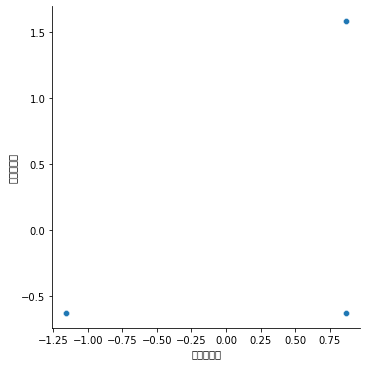

In [19]:
crimer.columns=crime.columns
sns.relplot(data=crime, x=crimer['생활비마련'],y=crimer['유흥비마련'])

In [25]:
cr=crime.corr(method='pearson')
cr

#전체적으로 독립성이 유지된다고 보기 쪼끔 어려울수도..

,생활비마련,유흥비마련,호기심,우발적,부주의,사행심,기타,미상
생활비마련,1.000000,0.547723,NaN,0.750000,0.730297,0.353553,0.471405,0.471405
유흥비마련,0.547723,1.000000,NaN,0.730297,0.400000,0.645497,0.258199,0.258199
호기심,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
우발적,0.750000,0.730297,NaN,1.000000,0.547723,0.471405,0.353553,0.353553
부주의,0.730297,0.400000,NaN,0.547723,1.000000,0.258199,0.645497,0.645497
사행심,0.353553,0.645497,NaN,0.471405,0.258199,1.000000,0.166667,0.166667
기타,0.471405,0.258199,NaN,0.353553,0.645497,0.166667,1.000000,1.000000
미상,0.471405,0.258199,NaN,0.353553,0.645497,0.166667,1.000000,1.000000
